About this notebook: A sentiment analysis of Yelp restaurant reviews. Dataset is in the form of csv obtained from Kaggle. The dataset contains 10000 reviews posted by users and the task is to identify if the review is positive or negative. The reviews are described by ratings 1-5 where 1 is low and 5 is high. 

### Tags: Text processing, Word Cloud, Data Exploration and Visualization, Classification, Logistic Regression, Feature Extraction, TF-IDF, Machine Learning, Model Training and Evaluation, Pandas, NumPy, NLTK, Scikit-Learn, Seaborn, Matplotlib

### Import Dependencies

In [1]:
%matplotlib inline
#Data manipulation and math
import pandas as pd
import numpy as np

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

#Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#Regex
import re

#Train-Test Splitting
from sklearn.model_selection import train_test_split

#Classifer
from sklearn.linear_model import LogisticRegression

#Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import roc_auc_score

#Save and load model
import pickle

### Read the CSV file 

In [2]:
df = pd.read_csv('yelp.csv')

In [3]:
#See the first 10 instances of the dataframe
df.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


In [4]:
#See the last 10 instances of the dataset
df.tail(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2
9993,maB4VHseFUY2TmPtAQnB9Q,2011-06-27,SNnyYHI9rw9TTltVX3TF-A,4,"Judging by some of the reviews, maybe I went o...",review,T46gxPbJMWmlLyr7GxQLyQ,1,1,0
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [5]:
#Check the stats
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
#Obtain a quick description of data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [7]:
#Check the shape of data
df.shape

(10000, 10)

In [8]:
#Explore any useful correlation
stars = df.groupby('stars').mean()
stars.corr()

,cool,useful,funny
cool,1.000000,-0.743329,-0.944939
useful,-0.743329,1.000000,0.894506
funny,-0.944939,0.894506,1.000000


### Data Visualization

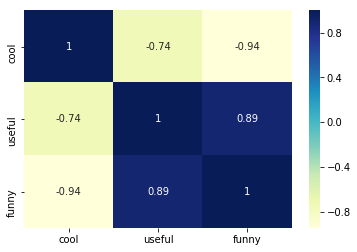

In [9]:
#Plot a correlation map 
sns.heatmap(data=stars.corr(), annot=True, cmap="YlGnBu")

Text(0,0.5,'Frequency')

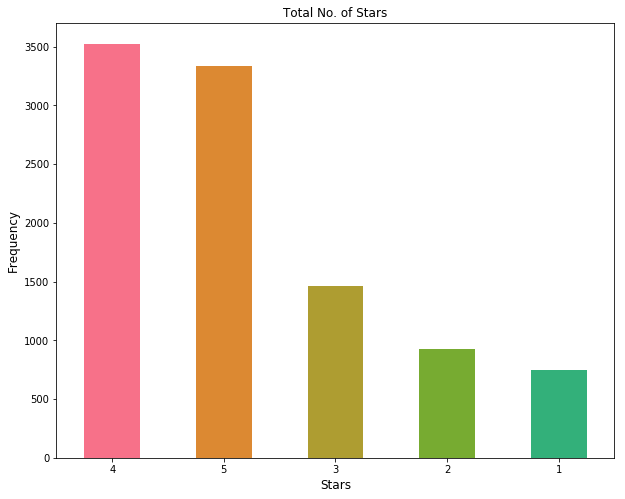

In [10]:
#Visualize the number of reviews of each star 1-5
colors=sns.color_palette("husl", 10)
pd.Series(df["stars"]).value_counts().plot(kind = "bar",color=colors,figsize=(10,8),rot=0, title = "Total No. of Stars")
plt.xlabel('Stars', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

In [11]:
#We will create a new column that combines the stars 1-3 as negative and 4-5 as positive
df['new_star']=df['stars'].apply(lambda x: 0 if x<=3 else 1)

In [12]:
#See the new column values
df['new_star']

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      0
16      0
17      1
18      0
19      1
20      0
21      1
22      1
23      0
24      1
25      1
26      1
27      1
28      1
29      1
       ..
9970    1
9971    1
9972    1
9973    1
9974    0
9975    1
9976    0
9977    1
9978    1
9979    1
9980    1
9981    1
9982    1
9983    0
9984    0
9985    1
9986    1
9987    0
9988    1
9989    1
9990    1
9991    1
9992    1
9993    1
9994    1
9995    0
9996    1
9997    1
9998    0
9999    1
Name: new_star, Length: 10000, dtype: int64

Text(0,0.5,'Frequency')

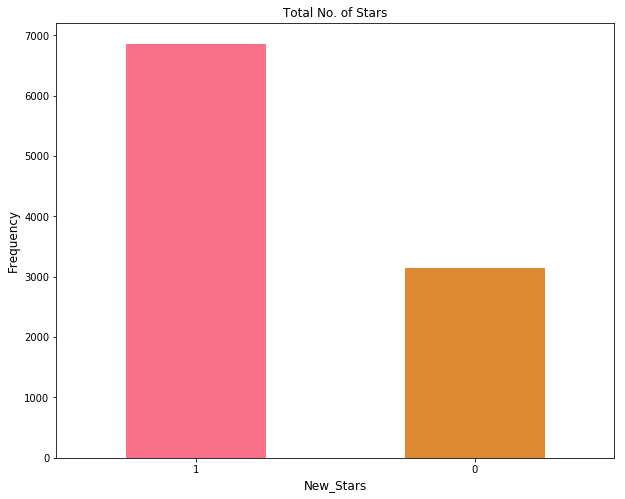

In [13]:
#Visualize as before
colors=sns.color_palette("husl", 10)
pd.Series(df["new_star"]).value_counts().plot(kind = "bar",color=colors,figsize=(10,8),rot=0, title = "Total No. of Stars")
plt.xlabel('New_Stars', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

### Word Cloud Generation for positive and negative reviews

In [14]:
#Visualization using wordcloud 
def wcloud(val):
    """
    This function takes input a binary integer value 0 or 1
    and returns the respective word cloud for the associated sentiment.
    """
    df1=df[df['new_star']==val]
    words = ' '.join(df1['text'])
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=2000, height=1500).generate(cleaned_word)
    plt.figure(1,figsize=(15, 15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

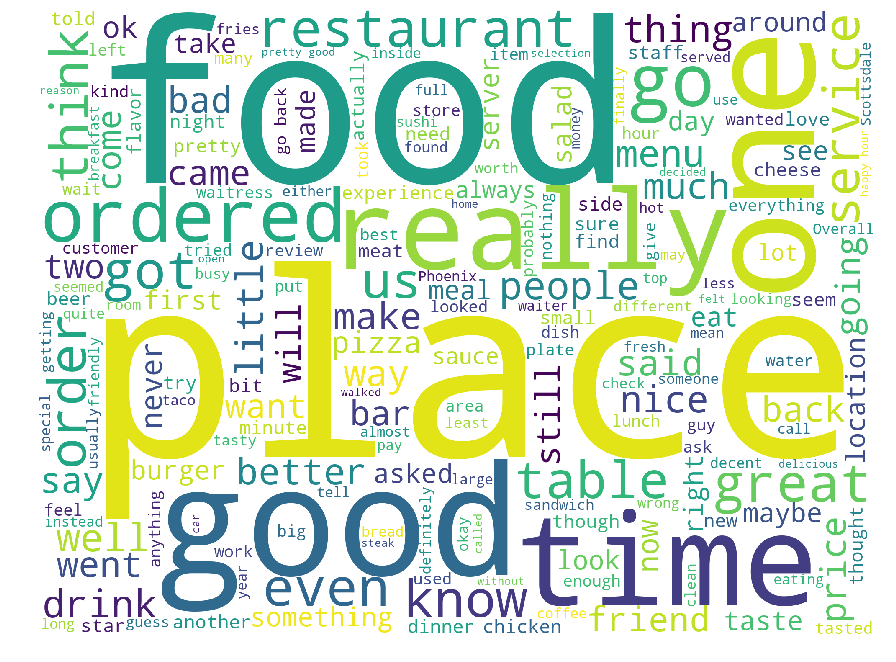

In [15]:
#Word Cloud for negative and neutral reviews (stars 1-3)
wcloud(0)

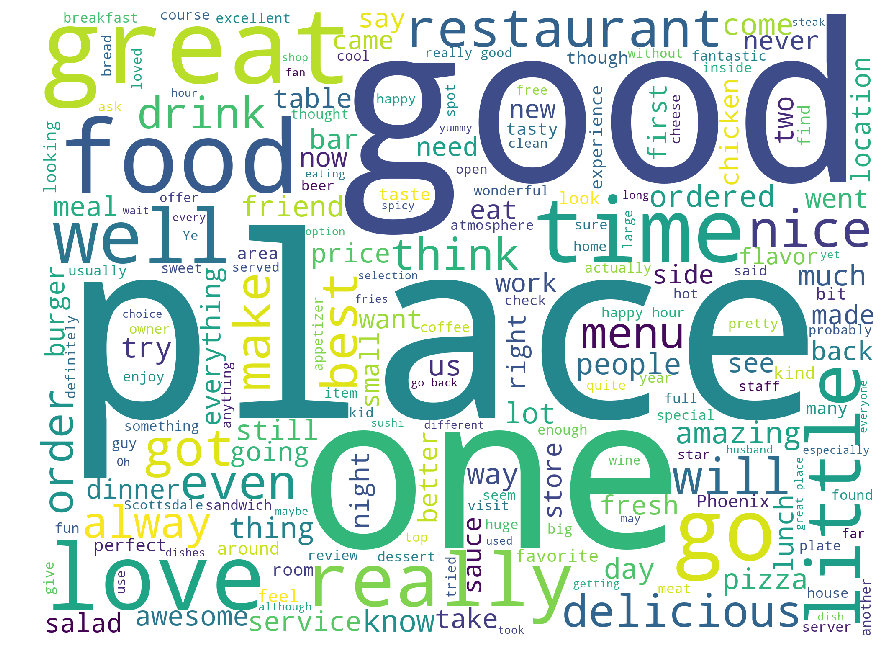

In [16]:
#Word Cloud for positive reviews (stars 4-5)
wcloud(1)

### Text Processing

In [17]:
#Preprocess the text
def text_to_words(raw_text):
    letters = re.sub("[^a-zA-Z]", " ",raw_text) #Grab letters
    words = letters.lower().split() #Lowercase                             
    stops = set(stopwords.words("english")) #Get unique stopwords                  
    meaningful_words = [w for w in words if not w in stops] 
    return ( " ".join( meaningful_words ))

In [18]:
#Append new column
df['clean_text']=df['text'].apply(lambda x: text_to_words(x))

### Train-Test Split

In [19]:
#Split the data into two sets namely the train and test set
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['new_star'], test_size=0.33, random_state=0)

### Feature Extraction and Vectorization using TF-IDF

In [20]:
#Create the transform
vectorizer = TfidfVectorizer(max_features=2500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  

#Encode document
X_train_vector = vectorizer.fit_transform(X_train).toarray() #Fit to training features and transform

X_test_vector = vectorizer.transform(X_test).toarray() #Only transform test features using the same vectorizer

#Summarize encoded vector
print("The shape of X_train_vector is: ", X_train_vector.shape)
print("The shape of X_test_vector is: ", X_test_vector.shape)

The shape of X_train_vector is:  (6700, 2500)
The shape of X_test_vector is:  (3300, 2500)


### Review Classification using Logistic Regression

In [21]:
#Define the model and fit it to the training data
classifier = LogisticRegression(C=1.0, random_state=0, solver='sag')
classifier.fit(X_train_vector, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

### Model Evaluation

In [22]:
#Evaluate the model on test data
y_pred = classifier.predict(X_test_vector)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 597  431]
 [ 138 2134]]


In [23]:
#Check Precision, Recall and F1-Score of both classes (0 and 1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.58      0.68      1028
           1       0.83      0.94      0.88      2272

   micro avg       0.83      0.83      0.83      3300
   macro avg       0.82      0.76      0.78      3300
weighted avg       0.83      0.83      0.82      3300



In [24]:
#Check accuracy
print('Training accuracy:', classifier.score(X_train_vector, y_train))
print('Test accuracy:', classifier.score(X_test_vector, y_test))

Training accuracy: 0.8792537313432836
Test accuracy: 0.8275757575757576


### Save the trained model for future use (verify by loading)

In [25]:
#Save the model as a pickle object in Python
with open('logclassifier', 'wb') as picklefile:  
    pickle.dump(classifier,picklefile)

In [26]:
#Load the model
with open('logclassifier', 'rb') as training_model:  
    model = pickle.load(training_model)

In [27]:
#Verify that the model has been saved 
y_pred2 = model.predict(X_test_vector)
print(classification_report(y_test, y_pred2))  

              precision    recall  f1-score   support

           0       0.81      0.58      0.68      1028
           1       0.83      0.94      0.88      2272

   micro avg       0.83      0.83      0.83      3300
   macro avg       0.82      0.76      0.78      3300
weighted avg       0.83      0.83      0.82      3300



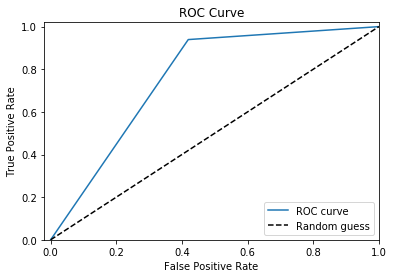

In [28]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#Create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [29]:
#Check the roc_auc_score
roc_auc_score(y_test, y_pred)

0.7599999314955883